## Data Read

In [10]:
import pandas as pd
import numpy as np
from numpy import array, hstack
import matplotlib.pyplot as plt
import os
import os.path
import codecs, json
from timeit import default_timer as timer
from sklearn import preprocessing
from collections import Counter

data = pd.read_csv('data/augmento_input.csv')
data = data.drop(columns=['date'])
data1 = pd.read_csv('data/BTC-USD.csv')
data1 = data1.rename(columns={'Close':'BTC_Price','Volume':'BTC_Volume'})
data2 = data1[['Date','BTC_Price','BTC_Volume']]
dataset = pd.concat([data2, data], axis=1)

In [11]:
print(dataset.isnull().values.any())
print(dataset.isnull().sum())
dataset.isnull().sum()
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]
rows_with_nan

False
Date                    0
BTC_Price               0
BTC_Volume              0
Hacks                   0
Pessimistic.Doubtful    0
                       ..
Rumor                   0
Scam.Fraud              0
Airdrop                 0
Optimistic              0
Negative                0
Length: 96, dtype: int64


NameError: name 'df' is not defined

In [132]:
dataset.index[dataset['Date']=='2020-10-09']

Int64Index([1438], dtype='int64')

In [133]:
dataset.iloc[1437]

Date                     2020-10-08
BTC_Price                   10923.6
BTC_Volume              21962121001
Hacks                            26
Pessimistic.Doubtful             76
                           ...     
Rumor                            12
Scam.Fraud                      132
Airdrop                           6
Optimistic                      279
Negative                       1143
Name: 1437, Length: 96, dtype: object

## WordCloud

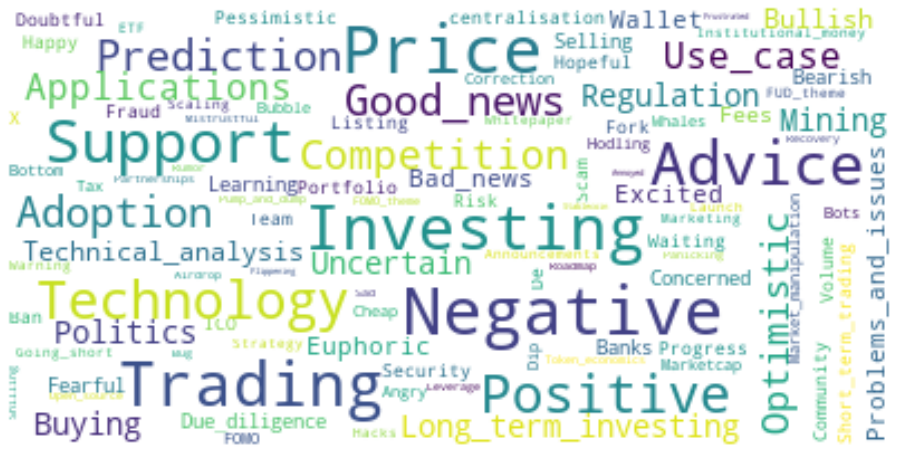

In [134]:
from wordcloud import WordCloud
df_wc = data
df_wc1 = df_wc.sum(axis =0)
#ax = tt.plot.bar()
word_counts = (df_wc1/min(df_wc1)).to_numpy().astype(int)
#print(word_counts)
word_names = df_wc.columns
text= ''
for i in range(len(df_wc1)):
    for j in range(word_counts[i]):
        text += word_names[i]+','
wordcloud = WordCloud(max_font_size=30, background_color="white",collocations=False).generate(text)
fig = plt.figure(figsize = (16,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## K-means

In [13]:
df = dataset.set_index('Date')
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(df)

X = data[:,2:]
y = data[:,0]
y = y.reshape(-1, 1)

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.labels_

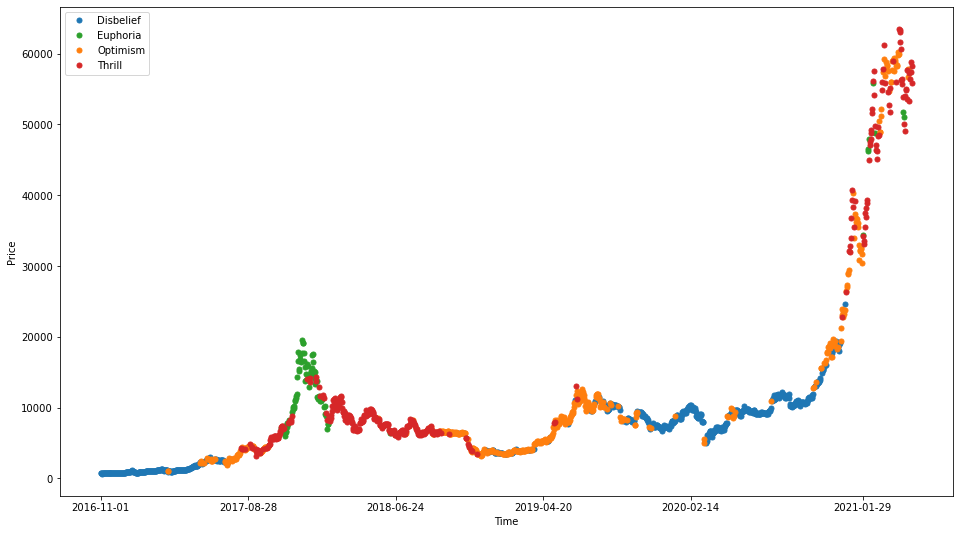

In [45]:
df_new = df.copy()
df_new['Label'] = labels
df_new['ind'] = np.arange(df_new.shape[0])
df_new['Label'].replace({2:'Disbelief',1:'Optimism',3:'Euphoria',0:'Thrill'},inplace=True)
fig = plt.figure(figsize = (16,9))

groups = df_new.groupby('Label')
color = ['C0','C3','C2','C1']
for name, group in groups:
    if name == 'Disbelief':
        plt.plot(group.ind, group.BTC_Price, marker='.', linestyle='', markersize=10, label=name,color='C0')
    elif name == 'Optimism':
        plt.plot(group.ind, group.BTC_Price, marker='.', linestyle='', markersize=10, label=name,color='C1')
    elif name == 'Thrill':
        plt.plot(group.ind, group.BTC_Price, marker='.', linestyle='', markersize=10, label=name,color='C3')
    elif name == 'Euphoria':
        plt.plot(group.ind, group.BTC_Price, marker='.', linestyle='', markersize=10, label=name,color='C2')

xx = [0,300,600,900,1200,1550]
plt.xticks(xx,df_new.index[xx])
plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")
plt.rcParams.update({'font.size': 20})

## LASSO feature selection

In [32]:
data = pd.read_csv('data/augmento_input.csv')
data = data.drop(columns=['date'])
data1 = pd.read_csv('data/BTC-USD.csv')
data1 = data1.rename(columns={'Close':'BTC_Price','Volume':'BTC_Volume'})
data1 = data1.drop(columns=['Adj Close'])
data2 = data1[['Date','BTC_Price','BTC_Volume']]
dataset = pd.concat([data2, data], axis=1)
data1 = data1.drop(columns=['BTC_Price','Date'])
dataset = pd.concat([dataset, data1.iloc[:, 0:3]], axis=1)
df = dataset.set_index('Date')

In [33]:
print(dataset.isnull().values.any())
print(dataset.isnull().sum())
dataset.isnull().sum()
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]
rows_with_nan

False
Date                    0
BTC_Price               0
BTC_Volume              0
Hacks                   0
Pessimistic.Doubtful    0
                       ..
Optimistic              0
Negative                0
Open                    0
High                    0
Low                     0
Length: 99, dtype: int64


[]

In [45]:
df

,BTC_Price,BTC_Volume,Hacks,Pessimistic.Doubtful,Banks,Selling,Market_manipulation,X.De..centralisation,Angry,ETF,...,Price,Use_case.Applications,Rumor,Scam.Fraud,Airdrop,Optimistic,Negative,Open,High,Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-01,729.793030,130527000,13,61,98,62,15,67,19,24,...,710,276,7,71,2,231,784,701.336975,736.452026,701.336975
2016-11-02,740.828979,84865200,28,68,98,57,15,70,16,17,...,589,275,4,54,0,271,827,730.065979,740.828979,722.348999
2016-11-03,688.700012,172808000,26,62,110,68,17,56,19,7,...,765,240,10,44,0,227,815,742.346008,745.773010,678.156006
2016-11-04,703.234985,99907696,42,43,85,68,32,58,20,9,...,615,200,30,75,1,166,743,689.124023,706.929993,685.562988
2016-11-05,703.418030,53752300,17,48,75,56,19,57,12,8,...,524,195,10,54,0,175,629,703.525024,707.510010,697.739014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-06,56396.515625,69523285106,45,237,367,487,108,229,125,34,...,3577,795,28,209,6,889,3895,57441.308594,58363.316406,55382.507813
2021-05-07,57356.402344,68434023376,28,220,310,446,113,176,110,59,...,3209,653,36,200,13,766,3368,56413.953125,58606.632813,55321.847656
2021-05-08,58803.777344,65382980634,29,212,249,560,107,155,113,47,...,3352,651,41,192,8,793,3299,57352.765625,59464.613281,56975.210938


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

In [41]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(df)
X = data[:-1,:]
y = data[1:,0]
y = y.reshape(-1, 1)
tscv = TimeSeriesSplit(n_splits=10)
model = Lasso()
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
mae_lasso_error_all = []
for i in grid['alpha']:
    mae_temp = []
    for train_index, test_index in tscv.split(X):
        if i==0:
            reg = LinearRegression().fit(X[train_index],y[train_index])
            y_pred_linear = reg.predict(X[test_index])
            mae_temp.append(mean_absolute_error(y[test_index], y_pred_linear))
        else:
            model = Lasso(alpha=i)
            model.fit(X[train_index],y[train_index])
            y_pred_lasso = model.predict(X[test_index])
            mae_temp.append(abs(y[test_index] - y_pred_lasso))
    mae_temp2 = np.mean(np.array(mae_temp))
    mae_lasso_error_all.append(mae_temp2)
val, idx = min((val, idx) for (idx, val) in enumerate(mae_lasso_error_all))
print('best lasso alpha: ' ,grid['alpha'][idx])

best lasso alpha:  0.0


In [44]:
from sklearn.model_selection import RepeatedKFold
from numpy import arange

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.006
Config: {'alpha': 0.0}


/home/wayne/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/home/wayne/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/wayne/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08540006229808453, tolerance: 0.006335144500277567
  model = cd_fast.enet_coordinate_descent(


## LSTM prediction

In [ ]:
from sklearn import preprocessing

'''read kmeans labels '''
# obj_text = codecs.open('kmeans_labels.json', 'r', encoding='utf-8').read()
# kmeans_labels = json.loads(obj_text) 
kmeans_labels = labels
'''read data'''
# df = pd.read_csv('augmento_BTC_24h.csv', index_col = 0)
# df = df.reindex(index=df.index[::-1])

min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(df)

X = data[:-1,]
y = data[1:,0]
y = y.reshape(-1, 1)


# cwd = os.getcwd()
# arr = ['svr_k.json']
# print(arr)
# k_list = list()
# for i in range(len(arr)):
#     path_read =  os.path.join(cwd, arr[i])
#     obj_text = codecs.open(path_read, 'r', encoding='utf-8').read()
#     b_new = json.loads(obj_text)
#     k_list.append(b_new)


from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import keras
from timeit import default_timer as timer
# from numpy.random import seed
# seed(42)


dataset = X#X[:,k_list[ii]]
size_test = int(dataset.shape[0]/10) # split 80-10-10\

def split_dataset(data, y):
        # split into standard weeks
        train_X, test_X = data[0:-size_test], data[-size_test:]
        #print(train_X.shape)
        train_Y, test_Y = y[0:-size_test], y[-size_test:]
        # restructure into windows of weekly data
        return train_X, test_X,train_Y, test_Y
train_X, test_X,train_Y, test_Y = split_dataset(dataset,y)
train_X = train_X.reshape((train_X.shape[0],train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0],test_X.shape[1]))
train = hstack((train_X, train_Y))
test = hstack((test_X, test_Y))




#####################################################################################
#####################################################################################
# LSTM
#####################################################################################
#####################################################################################
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out=1):
        X, y = list(), list()
        for i in range(len(sequences)):
                # find the end of this pattern
                end_ix = i + n_steps_in
                out_end_ix = end_ix + n_steps_out-1
                # check if we are beyond the dataset
                if out_end_ix > len(sequences):
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
                X.append(seq_x)
                y.append(seq_y)
        return array(X), array(y)


def build_model(train, n_input):
        # prepare data
        #print(train.shape)
        train_x, train_y = split_sequences(train[:-size_test], n_input)
        val_x, val_y = split_sequences(train[-size_test:], n_input)
        #print(val_x.shape)
        # define parameters
        verbose, epochs, batch_size = 0, 1500, 16
        n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
        # reshape output into [samples, timesteps, features]
        train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
        # print(train_x.shape)
        # print(train_y.shape)
        # print(val_x.shape)
        # print(val_y.shape)
        # print(n_timesteps, n_features, n_outputs)
        val_y = val_y.reshape((val_y.shape[0], val_y.shape[1], 1))
        # define model
        model = Sequential()
        model.add(LSTM(128, activation='relu', input_shape=(n_timesteps,n_features), return_sequences=True))
        model.add(LSTM(64, activation='relu', return_sequences=False))
        model.add(RepeatVector(n_timesteps))
        model.add(LSTM(64, activation='relu', return_sequences=True))
        model.add(LSTM(128, activation='relu', return_sequences=True))
        
#         model.add(LSTM(300, activation='relu',return_sequences=True, input_shape=(n_timesteps, n_features)))
#         model.add(LSTM(300, activation='relu',return_sequences=True))
#         #model.add(RepeatVector(n_outputs))
#         model.add(LSTM(300, activation='relu',return_sequences=True))
#         model.add(TimeDistributed(Dense(100, activation='relu')))
        model.add(TimeDistributed(Dense(n_outputs)))
        model.compile(loss='mse', optimizer='adam')
        es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
        history =model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose,validation_data=(val_x, val_y),callbacks=[es_callback],shuffle=False)

        return model

def evaluate_model(train, test, n_input):
        # fit model
        model = build_model(train, n_input)
        # history is a list of weekly data
        history = [x for x in train]
        # walk-forward validation over each week
        train_copy = np.copy(train)
        predictions = list()
        #print(test[0,:].shape)
        for i in range(len(test)):
                # get real observation and add to history for predicting the next week
                history.append(test[i, :])
                # predict the week
                yhat_sequence = forecast(model, history, n_input)
                # store the predictions
                predictions.append(yhat_sequence)
                train_copy = np.concatenate((train_copy, test[i,:].reshape(1, -1)))
                #print(train_copy.shape)

        # evaluate predictions days for each week
        predictions = array(predictions)

        #score, scores = evaluate_forecasts(test[:, -1], predictions)
        return predictions


def forecast(model, history, n_input):
        # flatten data
        data = array(history)
        # retrieve last observations for input data
        input_x = data[-n_input:, :-1]
        # reshape into [1, n_input, 1]
        input_x = input_x.reshape((1, input_x.shape[0],input_x.shape[1]))
        # forecast the next week
        yhat = model.predict(input_x, verbose=0)
        # we only want the vector forecast
        yhat = yhat[0]
        return yhat

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def smape1(A, F):
    return 100/len(A) * np.sum(np.abs(F - A) / (np.abs(A) + np.abs(F)))

def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


input_s = [10,20,30,40,50,60]
for n_input in input_s:
    start = timer()
    repeats = 1
    results_p = pd.DataFrame()
    predictions_scores = list()
    predictions_list = list()
    for i in range(0,repeats):              
            predictions = evaluate_model(train, test, n_input)
            predictions_list.append(predictions)
            smape_pearsonr_p = smape(test[:, -1], predictions[:,0,0])
            print(smape_pearsonr_p)
            predictions_scores.append(smape_pearsonr_p)
    results_p['results'] = predictions_scores
    print(results_p.describe())
    dt = timer() - start
    print("Data compute time %f s" % dt)


# write_p = 'lstm_lstm_b_smape_svr.csv'
# results_p.to_csv(write_p, index=False)
# for i in range(repeats):
#         path = 'lstm_lstm_b('+str(ii)+')'+str(i)+'.json'
#         with open(path,'w') as f:
#                 json.dump(predictions_list[i].tolist(),f)

###############################################################################################
# def smape100(A, F):
#     return 100/len(A) * np.sum(np.abs(F - A) / (np.abs(A) + np.abs(F)))
    
# def mape(y_true, y_pred): 
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# smape100_list = []
# mape_list = []
# for i in range(1):
#     pred = np.array(predictions_list[i]).reshape(-1,)
#     obs = test[:,-1]
#     smape100_list.append(smape100(obs, pred))
#     mape_list.append(mape(obs,pred))
    
# results_smape100 = pd.DataFrame()
# results_smape100['results'] = smape100_list
# results_mape = pd.DataFrame()
# results_mape['results'] = mape_list

# write_p = 'lstm_lstm_b_smape100_svr.csv'
# results_smape100.to_csv(write_p, index=False)
# write_p = 'lstm_lstm_b_mape_svr.csv'
# results_mape.to_csv(write_p, index=False)